<a href="https://colab.research.google.com/github/basnow28/ITDS440---Statistical-Analysis-for-Data-Science/blob/main/Regression_Analysis_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
#leemos el fichero IMDB
df=pd.read_csv("/content/drive/MyDrive/EIU Statistical Analysis For Data Science/datasets/matches_cleaned.csv", sep=",")

Mounted at /content/drive


In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'attendance', 'round', 'date',
       'year', 'away_yellow_card_count', 'home_yellow_card_count',
       'home_red_card_count', 'away_red_card_count', 'penalty_kicks',
       'home_substitutes_count', 'away_substitutes_count'],
      dtype='object')

In [ ]:
df['round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage'], dtype=object)

In [ ]:
df.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,attendance,round,date,year,away_yellow_card_count,home_yellow_card_count,home_red_card_count,away_red_card_count,penalty_kicks,home_substitutes_count,away_substitutes_count
0,Spain,England,1,2.1,0,0,0.5,0,75784,Final,2023-08-20,2023,1,1,0,0,False,3,3
1,Sweden,Australia,2,1.8,0,0,0.8,0,49461,Third-place match,2023-08-19,2023,1,2,0,0,False,3,4
2,Australia,England,1,1.4,0,3,1.3,0,75784,Semi-finals,2023-08-16,2023,2,0,0,0,False,3,2
3,Spain,Sweden,2,1.6,0,1,0.9,0,43217,Semi-finals,2023-08-15,2023,0,0,0,0,False,3,3
4,Australia,France,0,1.6,7,0,2.0,6,49461,Quarter-finals,2023-08-12,2023,0,1,0,0,True,3,3


In [ ]:
# Assuming df is your cleaned dataset

# Define the target variable (home goals) and features
X = df[['home_xg', 'home_penalty', 'home_yellow_card_count', 'home_red_card_count', 'home_substitutes_count', 'attendance']
       + [col for col in df.columns if 'round_' in col]]
y = df['home_score']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print out the summary of the regression analysis
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

                            OLS Regression Results                            
Dep. Variable:             home_score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.40
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           2.26e-10
Time:                        21:05:25   Log-Likelihood:                -549.29
No. Observations:                 278   AIC:                             1113.
Df Residuals:                     271   BIC:                             1138.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
# Assuming df is your cleaned dataset

# Define the target variable (home goals) and features
X = df[['away_xg', 'away_penalty', 'away_yellow_card_count', 'away_red_card_count', 'away_substitutes_count', 'attendance']]
y = df['away_score']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print out the summary of the regression analysis
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

                            OLS Regression Results                            
Dep. Variable:             away_score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     9.973
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           5.96e-10
Time:                        21:05:25   Log-Likelihood:                -476.83
No. Observations:                 278   AIC:                             967.7
Df Residuals:                     271   BIC:                             993.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Machine learning

In [13]:
# Select features for predicting home_score
#X = df[['home_xg', 'home_penalty', 'home_yellow_card_count', 'home_red_card_count', 'home_substitutes_count', 'attendance']]
#y = df['home_score']

X = df[['away_xg', 'away_penalty', 'away_yellow_card_count', 'away_red_card_count', 'away_substitutes_count', 'attendance']]
y = df['away_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random forest

In [14]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {rf_mse}, R^2: {rf_r2}")

Random Forest - MSE: 1.2964622920634918, R^2: 0.2991322560557026


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Random Forest - MSE: {mse_best}, R^2: {r2_best}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest - MSE: 1.1658264567617218, R^2: 0.36975401168000466


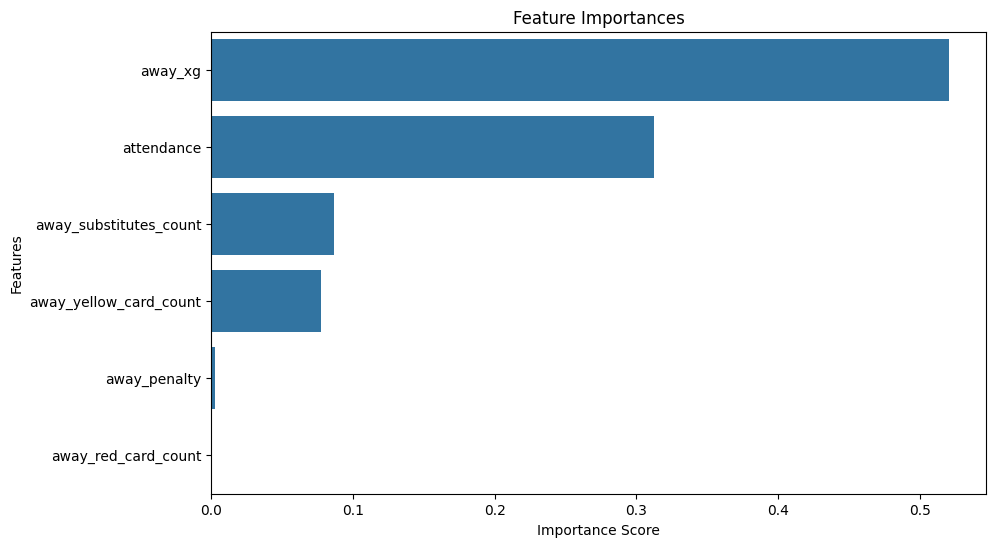

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Linear Regression

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {lr_mse}, R^2: {lr_r2}")

Linear Regression - MSE: 1.1648980362655479, R^2: 0.37025591596412344
